In [1]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
base_data = pd.read_csv('healthcare_dataset.csv')

In [3]:
base_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
base_data.shape

(55500, 15)

In [5]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
#Check for missing values
base_data.isna().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [7]:
base_data.columns = [c.strip() for c in base_data.columns]
str_cols = ['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']
for c in str_cols:
  if c in base_data.columns:
    base_data[c] = base_data[c].astype(str).str.strip()
base_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281305978155,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327286577885,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096078842456,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78240987528,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317813937623,458,Urgent,2022-10-09,Penicillin,Abnormal


In [8]:
base_data['Date of Admission'] = pd.to_datetime(base_data['Date of Admission']).dt.date.astype('datetime64[ns]')
base_data['Discharge Date'] = pd.to_datetime(base_data['Discharge Date']).dt.date.astype('datetime64[ns]')
base_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281305978155,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327286577885,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096078842456,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78240987528,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317813937623,458,Urgent,2022-10-09,Penicillin,Abnormal


In [9]:
# Length of Stay in days (float/int)
base_data['Length of Stay'] = (base_data['Discharge Date'] - base_data['Date of Admission']).dt.days
base_data.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281305978155,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327286577885,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096078842456,205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78240987528,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317813937623,458,Urgent,2022-10-09,Penicillin,Abnormal,20


In [10]:
# Rows with missing dates
print("Admissions with missing admission or discharge: ", base_data['Date of Admission'].isna().sum(), base_data['Discharge Date'].isna().sum())
base_data[['Date of Admission', 'Discharge Date', 'Length of Stay']].head(8)

Admissions with missing admission or discharge:  0 0


,Date of Admission,Discharge Date,Length of Stay
0,2024-01-31,2024-02-02,2
1,2019-08-20,2019-08-26,6
2,2022-09-22,2022-10-07,15
3,2020-11-18,2020-12-18,30
4,2022-09-19,2022-10-09,20
5,2023-12-20,2023-12-24,4
6,2020-11-03,2020-11-15,12
7,2021-12-28,2022-01-07,10


In [11]:
base_data['Billing Amount'] = pd.to_numeric(base_data['Billing Amount'], errors='coerce')
base_data['Age'] = pd.to_numeric(base_data['Age'], errors='coerce')
base_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20


In [12]:
base_data['admit_month'] = base_data['Date of Admission'].dt.month
base_data['admit_year'] = base_data['Date of Admission'].dt.year
base_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay,admit_month,admit_year
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2,1,2024
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,8,2019
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15,9,2022
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,11,2020
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20,9,2022


In [13]:
#Age Group
bins = [0, 18, 35, 50, 65, 120]
labels = ['0-17', '18-34', '35-49', '50-64', '65+']
base_data['Age_Group'] = pd.cut(base_data['Age'], bins = bins, labels = labels, right = False)
base_data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay,admit_month,admit_year,Age_Group
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2,1,2024,18-34
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,8,2019,50-64
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15,9,2022,65+
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,11,2020,18-34
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20,9,2022,35-49


In [14]:
kpi = {
    'Total_Patients' : len(base_data),
    'Patients with valid Admission dates' : base_data['Date of Admission'].notna().sum(),
    'Average Age' : base_data['Age'].mean(),
    'Median Age' : base_data['Age'].median(),
    'Average Length of Stay' : base_data['Length of Stay'].mean()
}
kpi_base_data = pd.Series(kpi).to_frame('Value')
display(kpi_base_data)

,Value
Total_Patients,55500.000000
Patients with valid Admission dates,55500.000000
Average Age,51.539459
Median Age,52.000000
Average Length of Stay,15.509009


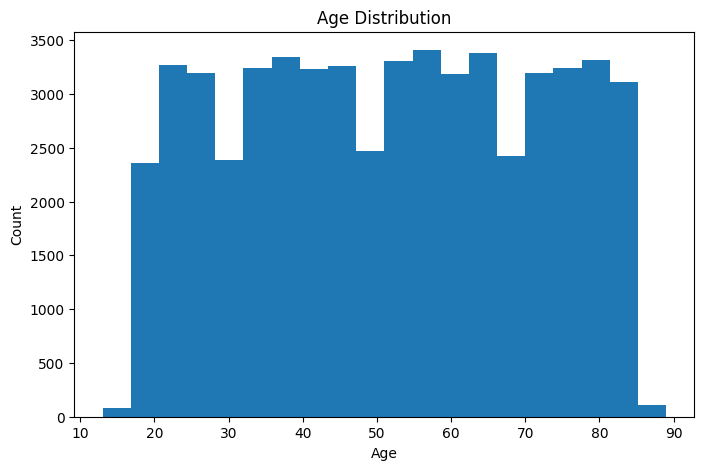

In [15]:
#Age distribution histogram
plt.figure(figsize=(8,5))
plt.hist(base_data['Age'].dropna(), bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

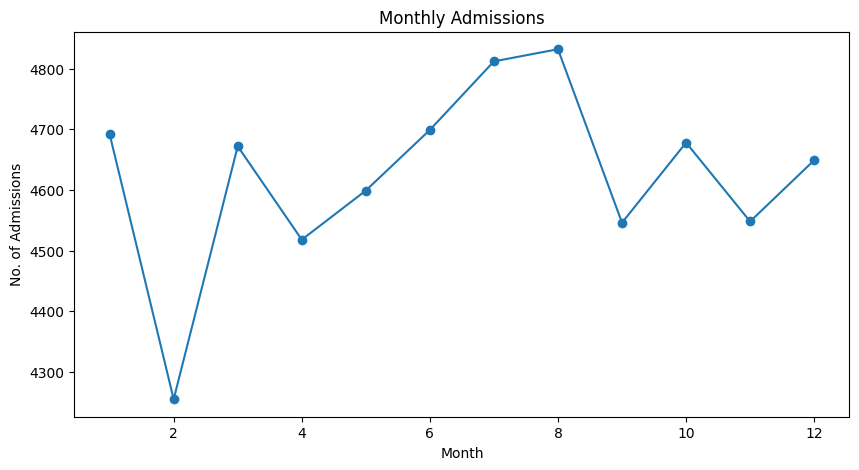

In [16]:
#Monthly admissions over time
admit_counts = base_data.groupby('admit_month').size().rename('admissions').reset_index()
plt.figure(figsize=(10,5))
plt.plot(admit_counts['admit_month'], admit_counts['admissions'], marker = 'o')
plt.title('Monthly Admissions')
plt.xlabel('Month')
plt.ylabel('No. of Admissions')
plt.show()

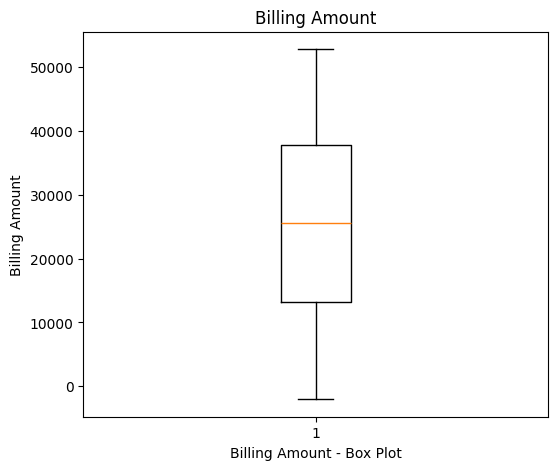

In [17]:
#Billing amount boxplot
plt.figure(figsize=(6,5))
plt.boxplot(base_data['Billing Amount'].dropna(), vert = True)
plt.title('Billing Amount')
plt.xlabel('Billing Amount - Box Plot')
plt.ylabel('Billing Amount')
plt.show()

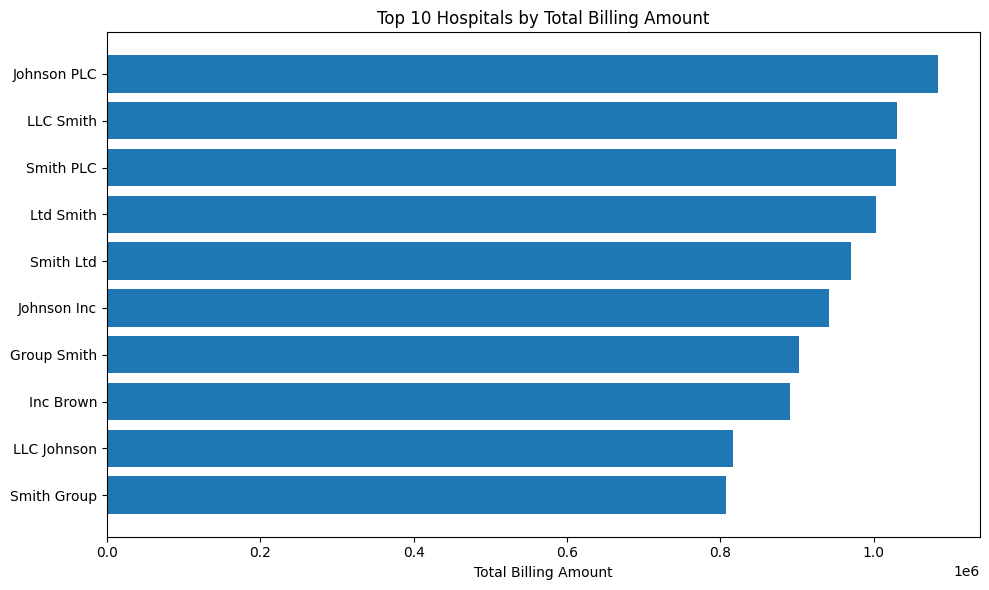

In [18]:
# 11. Revenue by Hospital (top 10)
rev_by_hosp = base_data.groupby('Hospital')['Billing Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(rev_by_hosp.index[::-1], rev_by_hosp.values[::-1])
plt.title('Top 10 Hospitals by Total Billing Amount')
plt.xlabel('Total Billing Amount')
plt.tight_layout()
plt.show()


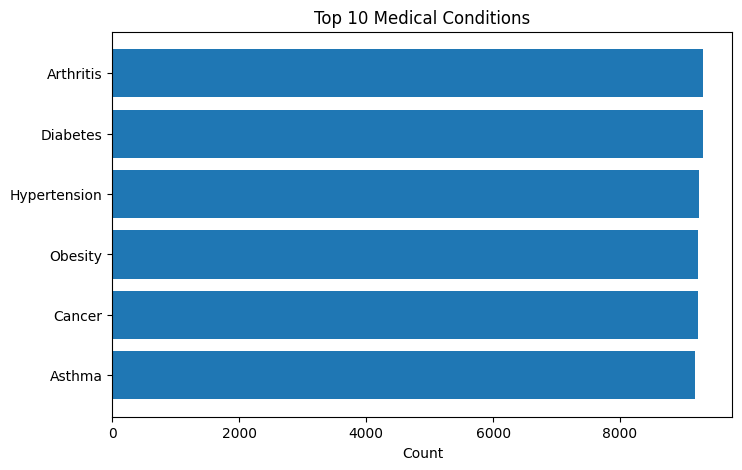

In [21]:
#Top 10 medical conditions
top_conditions = base_data['Medical Condition'].value_counts().head(10).iloc[::-1]
plt.figure(figsize=(8,5))
plt.barh(top_conditions.index, top_conditions.values)
plt.title('Top 10 Medical Conditions')
plt.xlabel('Count')
plt.show()

/tmp/ipython-input-2071697238.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels = types)


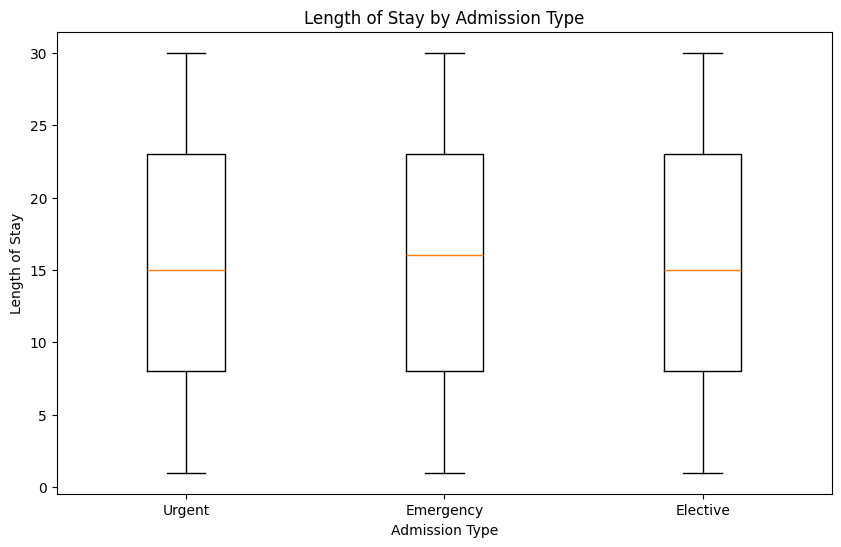

In [23]:
#Length of Stay by Admission type
los_by_type = base_data[['Admission Type', 'Length of Stay']].dropna()
types = los_by_type['Admission Type'].unique()
data_to_plot = [los_by_type.loc[los_by_type['Admission Type']==t, 'Length of Stay'].dropna() for t in types]
plt.figure(figsize=(10,6))
plt.boxplot(data_to_plot, labels = types)
plt.title('Length of Stay by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Length of Stay')
plt.show()

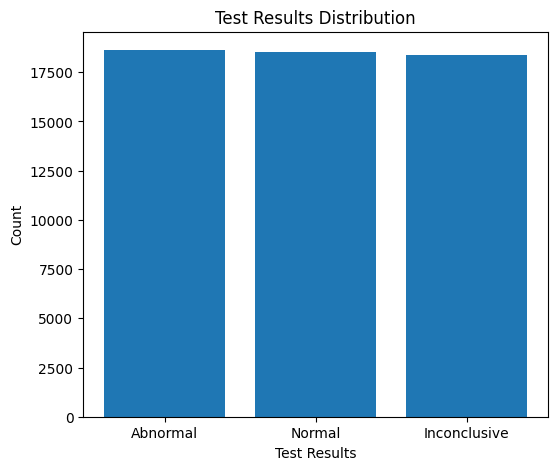

In [24]:
#Test results distribution
test_results = base_data['Test Results'].value_counts()
plt.figure(figsize=(6,5))
plt.bar(test_results.index, test_results.values)
plt.title('Test Results Distribution')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()

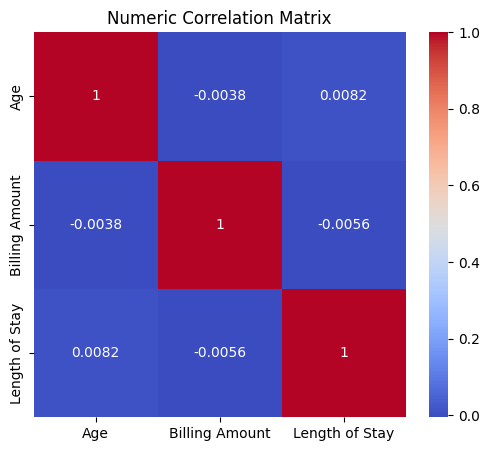

In [26]:
#Numeric Correlation (Age, Billing Amount, Length of Stay)
corr_matrix = base_data[['Age', 'Billing Amount', 'Length of Stay']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Numeric Correlation Matrix')
plt.show()